<a href="https://colab.research.google.com/github/aksh1743/car_segmentation/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [82]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

## Extract Images from Google Drive
In this step, store the image path from car dataset dataset into a variable.

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
Imagepaths = glob.glob("/content/drive/MyDrive/Car_datasets/*.jpg",recursive='true')

### Open the Images and store it in a List.
use the above varialbe to get the images and load the images to a array.

In [85]:
#opening image and converting it array:
OriginalImage = np.array([np.asarray(Image.open(img)) for img in Imagepaths])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


### Resize Image:
Some images may be captured by a camera and may vary in size, therefore, Resizing needs to be done , and  establish a base size for all images which can be used for image segmentation

In [86]:
#Resizing the images:
for i in range(len(OriginalImage)):
  OriginalImage[i] = cv2.resize(OriginalImage[i], (512,512),interpolation=cv2.INTER_NEAREST)

### Display Original Image:

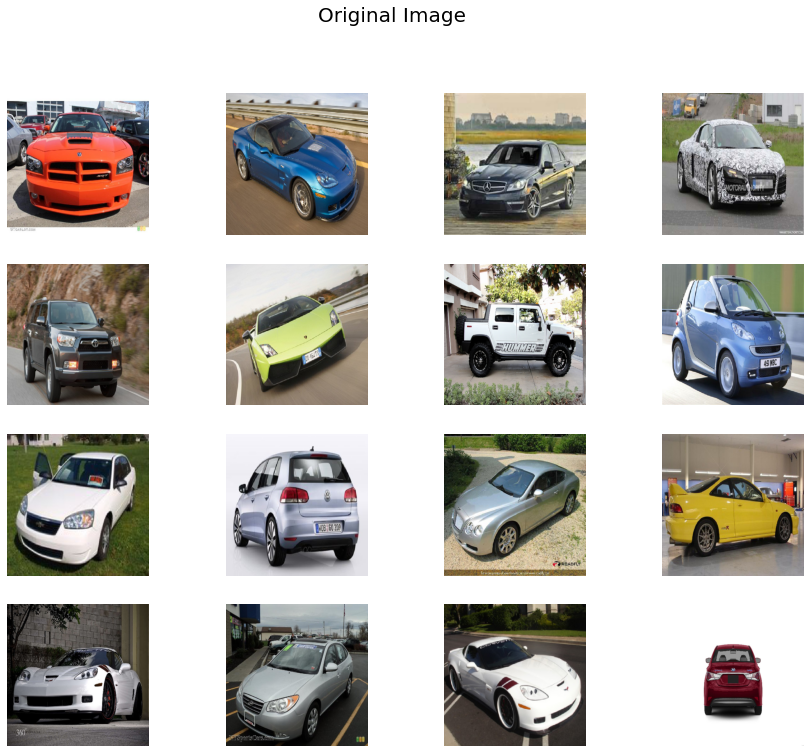

In [87]:
# Displaying the Orginal Image:
plt.figure(figsize=(15,12))
for i, img in enumerate(OriginalImage[0:16]):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.grid(False)
    plt.imshow(img)
    plt.suptitle("Original Image", fontsize=20)
plt.show()

# Pre-Processsing:
## Power Law Transformation (gamma correction):


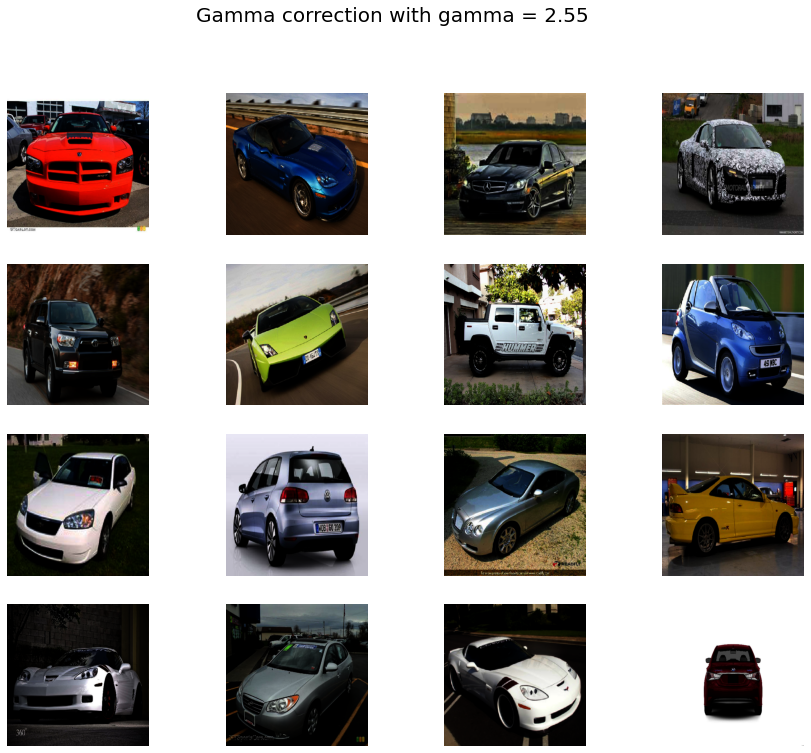

In [88]:
logTransformedImage= np.array([np.array(255*(img / 255) ** 2.55, dtype = 'uint8')  for img in OriginalImage])

# Display Gray-Scale Images:
plt.figure(figsize=(15,12))
for i, img in enumerate(logTransformedImage[0:16]):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.grid(False)
    plt.imshow(img)
    plt.suptitle("Gamma correction with gamma = 2.55", fontsize=20)
plt.show()

## Convert transformed Images to GrayScale Images
use the inbuilt function to convert them to GrayScale and then plot the GrayScale Images

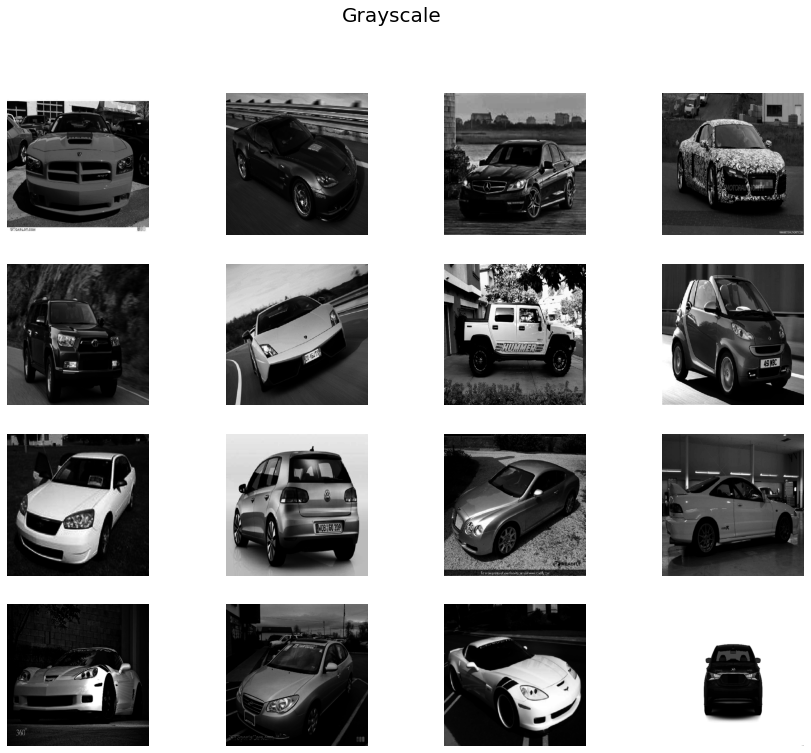

In [89]:
#converting the original images to GrayScale:
grayImage = np.array([cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) for img in logTransformedImage])

# Display Gray-Scale Images:
plt.figure(figsize=(15,12))
for i, img in enumerate(grayImage[0:16]):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.grid(False)
    plt.imshow(img,'gray')
    plt.suptitle("Grayscale", fontsize=20)
plt.show()



## Histogram Equalization

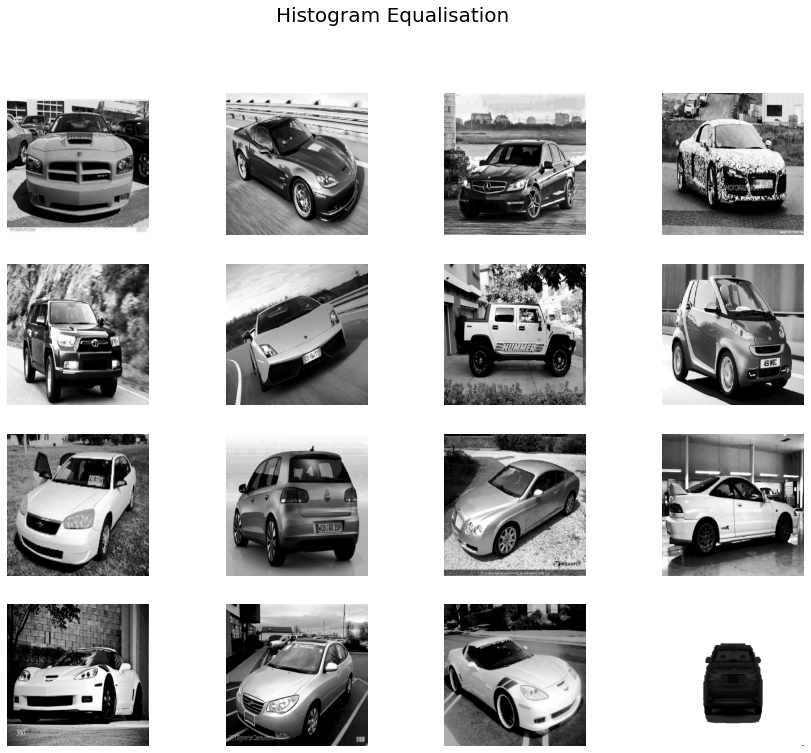

In [90]:
equilized = np.array([cv2.equalizeHist(img) for img in grayImage])
plt.figure(figsize=(15,12))
for i, img in enumerate(equilized[0:16]):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.grid(False)
    plt.imshow(img,'gray')
    plt.suptitle("Histogram Equalisation", fontsize=20)
plt.show()

# Segmentation:
## Binary Thresholding 
 using opencv tool to apply thresholding on the set of images

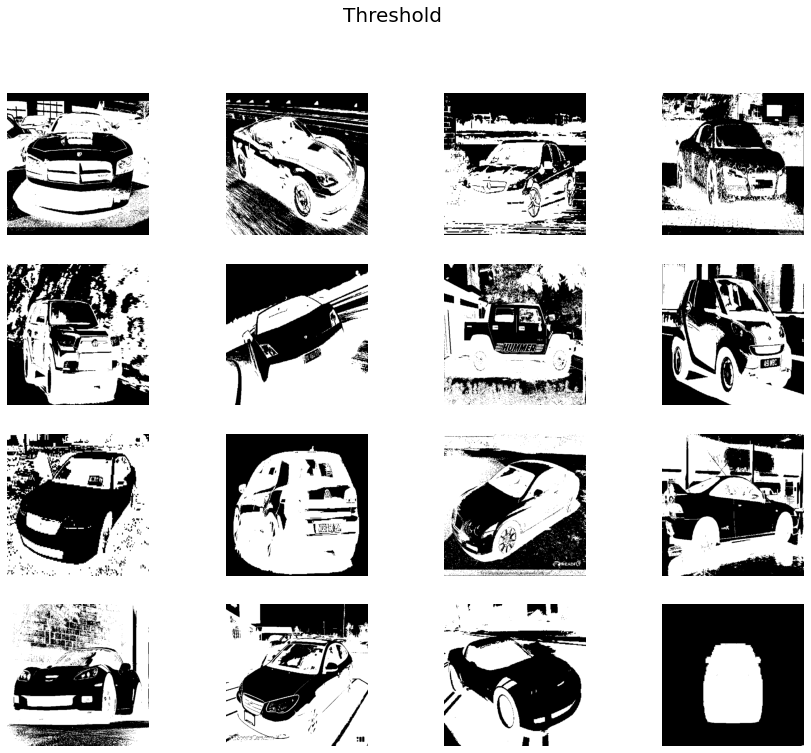

In [91]:
#Thresholding the Images:
thresh = [cv2.threshold(img, 130, 255, cv2.THRESH_BINARY_INV)[1] for img in equilized]

#displaying the Thresholding Images:
plt.figure(figsize=(15,12))
for i, img in enumerate(thresh[0:16]):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(img,'gray')
    plt.suptitle("Threshold", fontsize=20)
plt.show()

## Canny Edge Detection:

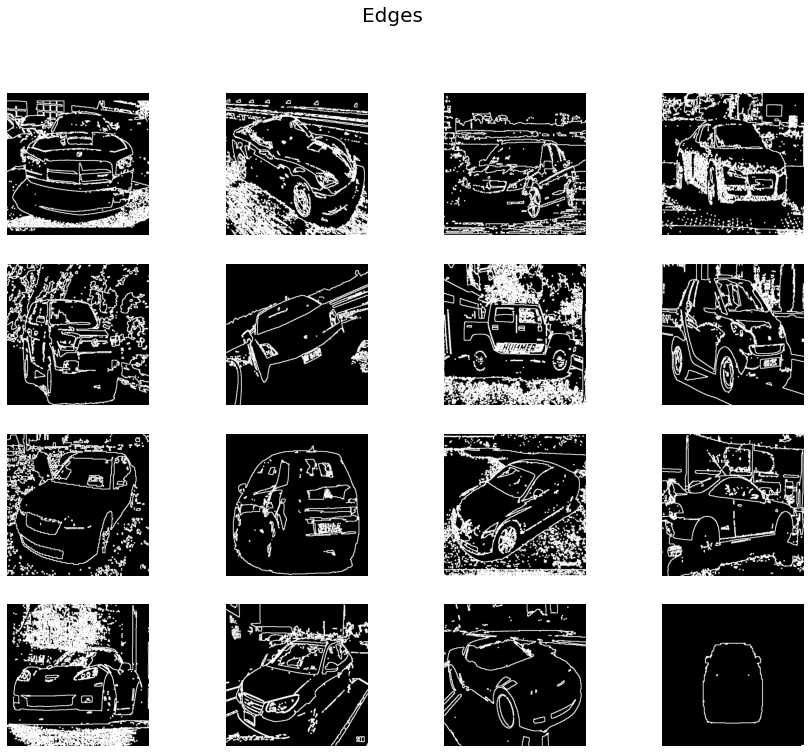

In [92]:
#canny Edge Detection:
edges = [cv2.dilate(cv2.Canny(img, 0, 255), None) for img in thresh]

#dsiplaying the Canny Edge:
plt.figure(figsize=(15,12))
for i, img in enumerate(edges[0:16]):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    plt.suptitle("Edges", fontsize=20)
plt.show()

## Applying Masks
applying the mask to the edge detected images, and then segmenting them

In [93]:
#mask:
masked=[]
segmented=[]

for i, img in (enumerate(edges)):
  if(i==16):
    continue
  cnt = sorted(cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
  mask = np.zeros((512,512), dtype='uint8')
  masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
  dst = cv2.bitwise_and(OriginalImage[i], OriginalImage[i], mask=mask)
  segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Displaying Image Masks:

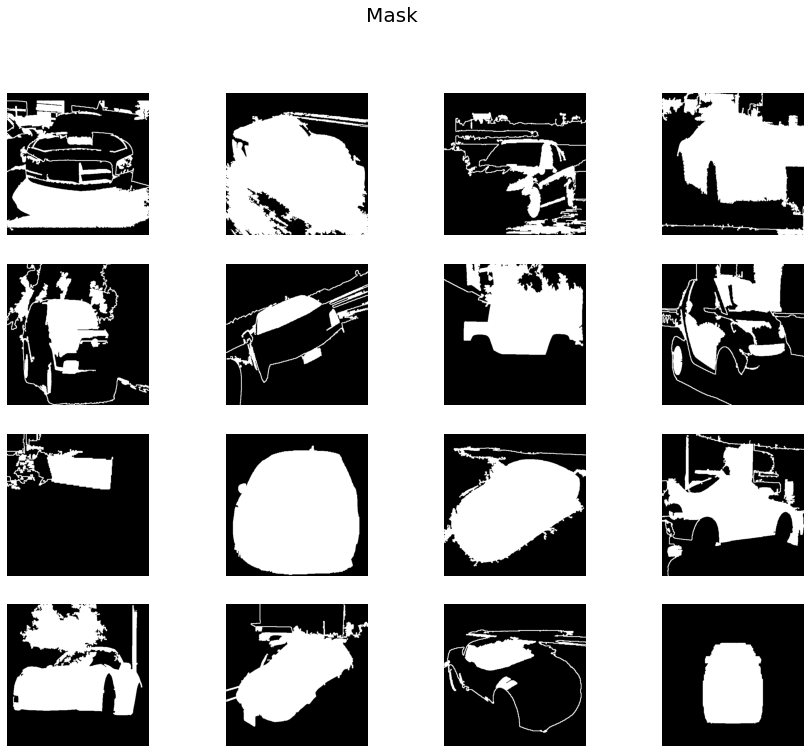

In [94]:
#displaying Masked Images:
plt.figure(figsize=(15,12))
for i, masking in enumerate(masked[0:16]):
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.grid(False)
  plt.imshow(masking, cmap='gray')
plt.suptitle("Mask", fontsize=20)
plt.show()

## Displaying the Segemented Images:
 using the plot function displaying the coroulred segmented objects

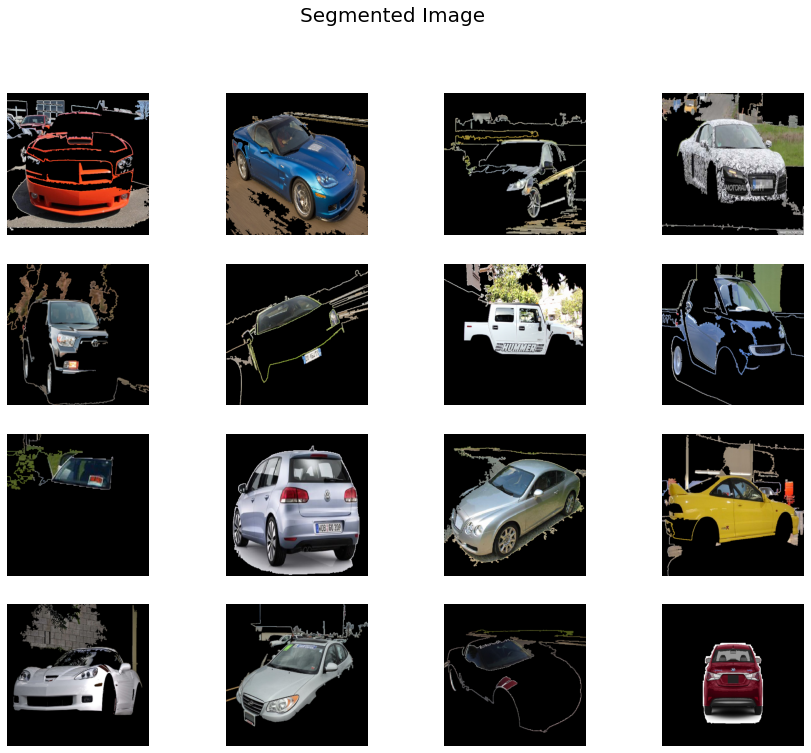

In [95]:
plt.figure(figsize=(15,12))
for i, img in enumerate(segmented[0:16]):
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  
plt.suptitle("Segmented Image", fontsize=20)
plt.show()

Text(0.5, 1.0, 'Segmented Image')

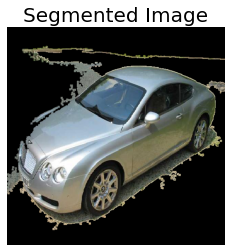

In [98]:
segmented[2] = cv2.resize(segmented[10], (2048, 1536),
                          interpolation=cv2.INTER_NEAREST)
plt.imshow(cv2.cvtColor(segmented[10], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.grid(False)
plt.title("Segmented Image", fontsize=20)

Text(0.5, 1.0, 'Segmented Image')

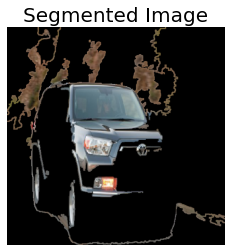

In [99]:
segmented[14] = cv2.resize(segmented[4], (2048, 1536),
                          interpolation=cv2.INTER_NEAREST)
plt.imshow(cv2.cvtColor(segmented[4], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.grid(False)
plt.title("Segmented Image", fontsize=20)